In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
file = Path("nutrition.csv", encoding='UTF-8')
file_df = pd.read_csv(file)
file_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [4]:
len(file_df)

88629

In [5]:
file_df.columns.tolist()

['YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'Datasource',
 'Class',
 'Topic',
 'Question',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value',
 'Data_Value_Alt',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'Low_Confidence_Limit',
 'High_Confidence_Limit ',
 'Sample_Size',
 'Total',
 'Age(years)',
 'Education',
 'Gender',
 'Income',
 'Race/Ethnicity',
 'GeoLocation',
 'ClassID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'LocationID',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategoryId1',
 'StratificationID1']

In [6]:
file_df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,88629.000000,88629.000000,0.0,79851.000000,79851.000000,79851.000000,79851.000000,79851.000000,88629.000000
mean,2016.011362,2016.011362,NaN,31.236493,31.236493,26.907732,36.135953,3656.809044,30.906475
std,3.121080,3.121080,NaN,10.113829,10.113829,9.907896,11.061591,18706.392637,17.485456
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2013.000000,2013.000000,NaN,24.300000,24.300000,20.000000,28.600000,516.000000,17.000000
50%,2016.000000,2016.000000,NaN,31.200000,31.200000,26.800000,35.900000,1109.000000,30.000000
75%,2019.000000,2019.000000,NaN,37.000000,37.000000,32.900000,42.200000,2408.000000,45.000000
max,2021.000000,2021.000000,NaN,77.600000,77.600000,70.200000,87.700000,476876.000000,78.000000


In [7]:
droppedna = file_df.dropna(subset = "Data_Value")
droppedna

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88624,2021,2021,ND,North Dakota,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.47531977900047, -100.11842104899966)",FV,FV1,Q019,VALUE,38,Gender,Male,GEN,MALE
88625,2021,2021,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Income,"$35,000 - $49,999",INC,INC3550
88626,2021,2021,WI,Wisconsin,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(44.39319117400049, -89.81637074199966)",PA,PA1,Q047,VALUE,55,Income,"$75,000 or greater",INC,INC75PLUS
88627,2021,2021,UT,Utah,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,NaN,Value,...,"(39.360700171000474, -111.58713063499971)",FV,FV1,Q018,VALUE,49,Income,"$50,000 - $74,999",INC,INC5075


In [8]:
clean_df = droppedna["LocationDesc"]

In [9]:
clean_df

0            National
1                Guam
2            National
3            National
4            National
             ...     
88624    North Dakota
88625     Puerto Rico
88626       Wisconsin
88627            Utah
88628        National
Name: LocationDesc, Length: 79851, dtype: object

In [10]:
file_df["Question"].nunique()

9

In [11]:
clean_df = file_df.loc[(file_df["Question"]=="Percent of adults aged 18 years and older who have obesity") | file_df["Question"]=="Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)"] 
#clean_df["Question"]=="Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)"

In [12]:
clean_df1 = file_df.loc[(file_df["Question"]=="Percent of adults aged 18 years and older who have obesity")]

In [13]:
clean_df2 = file_df.loc[ file_df["Question"]=="Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)"] 

In [14]:
clean_df_merge = pd.concat([clean_df1,clean_df2])
clean_df_merge

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
7,2012,2012,DC,District of Columbia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,VALUE,11,Education,Less than high school,EDU,EDUHS
9,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
12,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76723,2015,2015,MI,Michigan,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(44.661319543001, -84.71439027)",PA,PA1,Q043,VALUE,26,Age (years),55 - 64,AGEYR,AGEYR5564
76729,2013,2013,PA,Pennsylvania,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(40.793730152, -77.860700294)",PA,PA1,Q043,VALUE,42,Education,High school graduate,EDU,EDUHSGRAD
76760,2011,2011,NM,New Mexico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(34.520880952, -106.240580985)",PA,PA1,Q043,VALUE,35,Income,"$75,000 or greater",INC,INC75PLUS
76777,2015,2015,NH,New Hampshire,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,...,"(43.655950113, -71.50036092)",PA,PA1,Q043,VALUE,33,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [15]:
clean_df_merge.nunique()

YearStart                       11
YearEnd                         11
LocationAbbr                    55
LocationDesc                    55
Datasource                       1
Class                            2
Topic                            2
Question                         2
Data_Value_Unit                  0
Data_Value_Type                  1
Data_Value                     684
Data_Value_Alt                 684
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
Low_Confidence_Limit           666
High_Confidence_Limit          707
Sample_Size                   5987
Total                            1
Age(years)                       6
Education                        4
Gender                           2
Income                           7
Race/Ethnicity                   8
GeoLocation                    105
ClassID                          2
TopicID                          2
QuestionID                       2
DataValueTypeID                  1
LocationID          

In [16]:
clean_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1


In [19]:
df = clean_df_merge.loc[:, ["LocationAbbr", "Question"]]

In [20]:
df

,LocationAbbr,Question
1,GU,Percent of adults aged 18 years and older who ...
2,US,Percent of adults aged 18 years and older who ...
7,DC,Percent of adults aged 18 years and older who ...
9,AL,Percent of adults aged 18 years and older who ...
12,US,Percent of adults aged 18 years and older who ...
...,...,...
76723,MI,Percent of adults who achieve at least 150 min...
76729,PA,Percent of adults who achieve at least 150 min...
76760,NM,Percent of adults who achieve at least 150 min...
76777,NH,Percent of adults who achieve at least 150 min...


In [29]:
df1 = df[["Question", "LocationAbbr"]].value_counts()

In [32]:
df1 = df.groupby(["LocationAbbr"])["Question"].value_counts()

In [33]:
df1

LocationAbbr  Question                                                                                                                                                                                            
AK            Percent of adults aged 18 years and older who have obesity                                                                                                                                              308
              Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)    140
AL            Percent of adults aged 18 years and older who have obesity                                                                                                                                              308
              Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a

In [40]:
for row in df1.items():
    print(row)
    print()

(('AK', 'Percent of adults aged 18 years and older who have obesity'), 308)

(('AK', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'), 140)

(('AL', 'Percent of adults aged 18 years and older who have obesity'), 308)

(('AL', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'), 140)

(('AR', 'Percent of adults aged 18 years and older who have obesity'), 308)

(('AR', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'), 140)

(('AZ', 'Percent of adults aged 18 years and older who have obesity'), 308)

(('AZ', 'Percent of adults who achieve at least

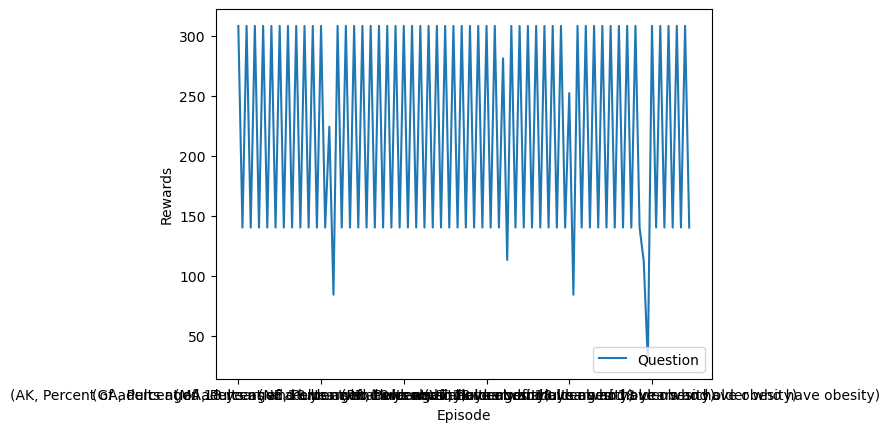

In [39]:
df1.plot()
plt.legend(loc='lower right')
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.show()

In [21]:
df["LocationAbbr"].value_counts()

KY    448
AR    448
IL    448
TN    448
MI    448
NV    448
WI    448
AZ    448
NE    448
IA    448
MA    448
MN    448
AK    448
OH    448
ND    448
VA    448
OR    448
CT    448
SC    448
MD    448
MO    448
ID    448
DE    448
VT    448
UT    448
IN    448
TX    448
PA    448
US    448
OK    448
DC    448
AL    448
RI    448
NY    448
CA    448
WA    448
NH    448
NM    448
HI    448
SD    448
WV    448
MS    448
KS    448
FL    448
ME    448
LA    448
MT    448
GA    448
NC    448
WY    448
CO    448
NJ    394
PR    336
GU    308
VI    140
Name: LocationAbbr, dtype: int64

In [ ]:
clean_df.nunique()